In [1]:
import fix_sys_path
from plasma_classes import *
from plasma_utils import *
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm

../source_code\plasma_utils.py:32: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(f8[:] (f8[:],f8[:],f8[:],f8[:] ))
../source_code\plasma_utils.py:32: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "TDMAsolver" failed type inference due to: No implementation of function Function(<class 'map'>) found for signature:
 
 >>> map(Function(<built-in function array>), UniTuple(array(float64, 1d, A) x 4))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'ol_map': File: numba\cpython\builtins.py: Line 725.
    With argument(s): '(Function(<built-in function array>), UniTuple(

In [2]:
root = os.getcwd()


In [3]:
exps = os.listdir(os.path.join(root, "logs"))
exps = list(sorted(exps))
exps

['Te10.0Nx2000_Np20000_h5e-06_tau2.5e-13_n7000000_06_06_2023_08_49_50',
 'Te13.0Nx2000_Np20000_h5e-06_tau2.5e-13_n7000000_06_06_2023_08_50_17',
 'Te17.0Nx2000_Np20000_h5e-06_tau2.5e-13_n7000000_06_06_2023_08_50_35',
 'Te20.0Nx2000_Np20000_h5e-06_tau2.5e-13_n7000000_06_06_2023_08_50_56']

In [4]:
#logpath = os.path.join(root, "logs",  exps[-1])

In [5]:
constants = {
    'n0': 1e17,                 # Reference concentration
    'q': 1.60217e-19,           # Particle charge
    'm_e': 9.1093837e-31,       # Electron mass
    'm_i': 1.672e-27,           # Ion mass
    'atomic mass': 131,         # Atomic mass
    'epsilon': 8.85e-12,        # Permittivity of free space
    
    'eV': 11600,                # Electronvolt
    'E1': 18.3,                 # Border energy in eV (SEE parameter)
    'alpha': 0.62,              # (SEE parameter)

    'T_e': 23,                  # Electron temperature
    'T_i': 600,                 # Ion temperature
    'k_b': 1.38e-23             # Boltzmann constant
}

numerical = {
    'N_x': 2000,                # Number of grid points
    'N_p': 20000,               # Number of particles
    'tau': 2.5e-13,               # Time step size

    'oscill_factor': 0.01,       # Factor for adjusting the plasma time step size
    'debye_factor': 0.1,         # Factor for adjusting the grid spacing based on Debye length
    'courant_factor': 0.25,     # Factor for adjusting the Courant time step size

    'integral_points': 100000,  # pool size to pick random velocities from
    'time_iterations': 7000000,   #number of time steps
    "pumping_windows": 12       #number of sliding windows for pumping algorythm
}

geometry = {
    'L': 1e-2,                  # Length of the system
    
    'left_border': 0.1,         # Left wall
    'right_border': 0.9,        # Right wall
    'neutral_range': (400, 1600) # Range to apply pumping and maxwellisation
}

modes = {
    'maxwellise': True,         # Flag for applying maxwellisation
    'pumping': True,            # Flag for considering particles pumping
    'saving': True,             # Flag for saving simulation data
    'injection': False,          # Flag for saving simulation data
    'add_datetime': True
}


periods = {
    "saving": 1000,              # Steps between saving simulation data
    "pumping": 500,             # Steps between applying pumping
    "maxwellise": 500,           # Steps between applying Maxwellian distribution
    "pumping_offset": 0       #time step after which pumping is activated
}

filenames = {
    'system_states': "system_states.bin", # File path for saving main system's states
    'secondary_electrons': "secondary_electrons.bin", # -//- secondary electrons
    'absorbed_electrons': "absorbed_electrons.bin", # -//- absorbed electrons
    'absorbed_ions': "absorbed_ions.bin" # -//- absorbed ions
}


In [6]:
params = {
    "constants": constants,
    "numerical": numerical,
    "geometry": geometry,
    "periods": periods,
    "modes": modes,
    "filenames": filenames,
}

In [7]:
particles, nodes, walls, calc_dict =  prepare_system(params)
electrons, ions = particles

Particles are already denormalized
Particles are already denormalized
neutral range too wide!
neutral range: (400, 1600)
maximum range: [422.25398814238474, 1577.746011857615]
adjusting...
adjusted neutral_range: (424.0, 1576.0)
2400


In [8]:
main_cycle(electrons, ions, nodes, walls, calc_dict)

h = 5e-06, tau = 2.5e-13
Launching calculations...


100%|██████████| 7000000/7000000 [2:58:01<00:00, 655.31it/s]  


In [9]:
electrons_over_time = []
ions_over_time = []
e_conc_history = []
i_conc_history = []
phi_center = []
phi_over_time = []
e_over_time = []
e_distr = []
i_distr = []
for i, nodes, particles, walls in loop_over_states(calc_dict["filenames"]["system_states"]):
    electrons_over_time.append(particles[0].n_macro)
    ions_over_time.append(particles[1].n_macro)
    e_conc_history.append(nodes.conc_e.copy())
    i_conc_history.append(nodes.conc_i.copy())
    phi_over_time.append(nodes.phi.copy())
    e_over_time.append(nodes.E.copy())
    e_distr.append(particles[0].v.copy())
    i_distr.append(particles[1].v.copy())
    phi_center.append(nodes.phi[500])

In [23]:
np.mean(phi_center[6000:])

50.9716525959897

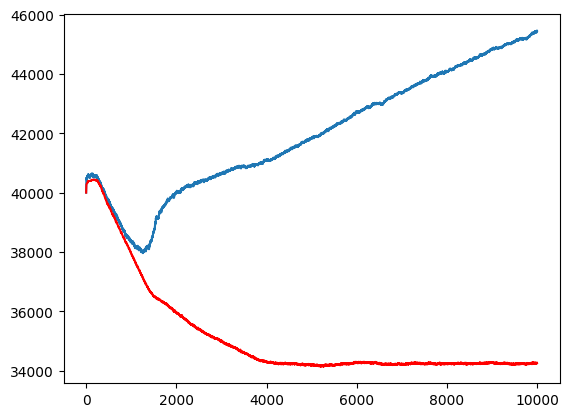

In [10]:
plt.plot(electrons_over_time)
plt.plot(ions_over_time, color='r')

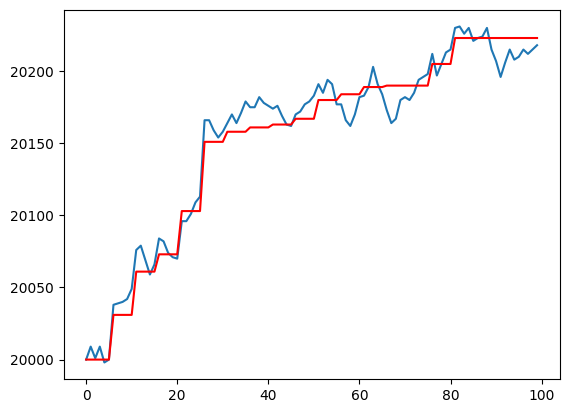

In [8]:
plt.plot(electrons_over_time[:100])
plt.plot(ions_over_time[:100], color='r')

UsageError: Line magic function `%matplotlib.inline` not found.


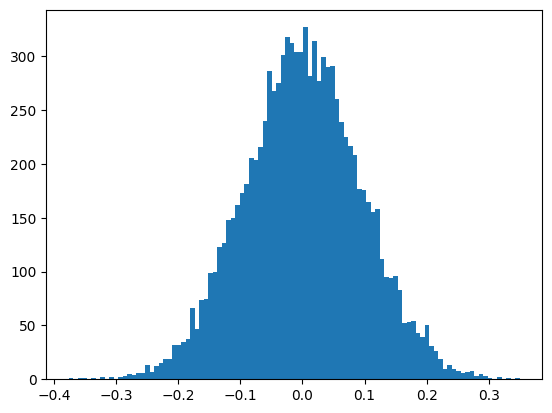

In [15]:
plt.hist(e_distr[0], bins=100)
%matplotlib.inline

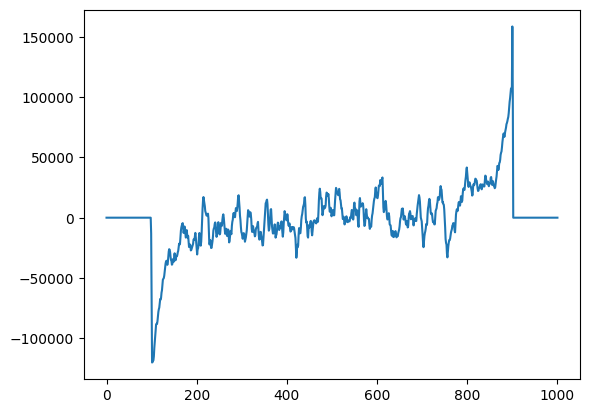

In [41]:
plt.plot(e_over_time[-1])

In [42]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [43]:
len(ions_over_time)

7337

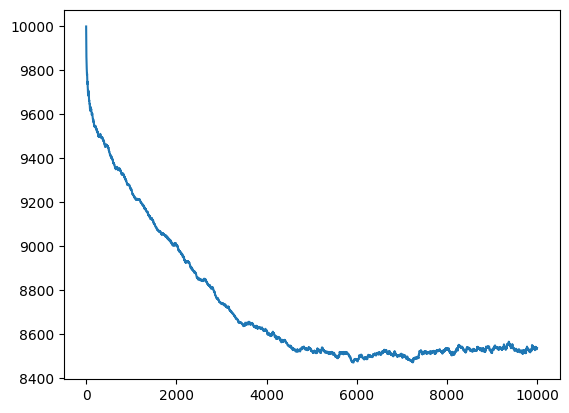

In [9]:
plt.plot(electrons_over_time)

In [116]:
electrons_over_time[-1]

8471

In [117]:
ions_over_time[-1]

8777

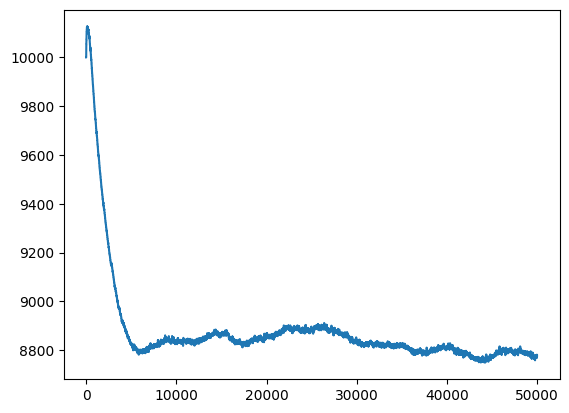

In [118]:
plt.plot(ions_over_time)

In [57]:
n_range = (100, 200)
windows = 10

In [58]:
len_range = n_range[1] - n_range[0]

In [60]:
window = len_range/windows
left = right = 0
for i in range(windows):
    left = window*i + 1
    right = left + window
    print(left, right)

0.0 10.0
10.0 20.0
20.0 30.0
30.0 40.0
40.0 50.0
50.0 60.0
60.0 70.0
70.0 80.0
80.0 90.0
90.0 100.0


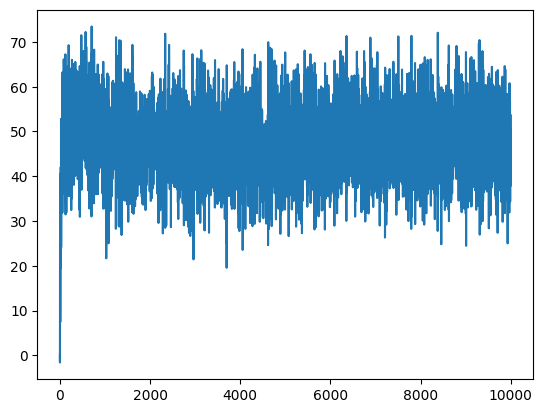

In [11]:
plt.plot(phi_center)

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


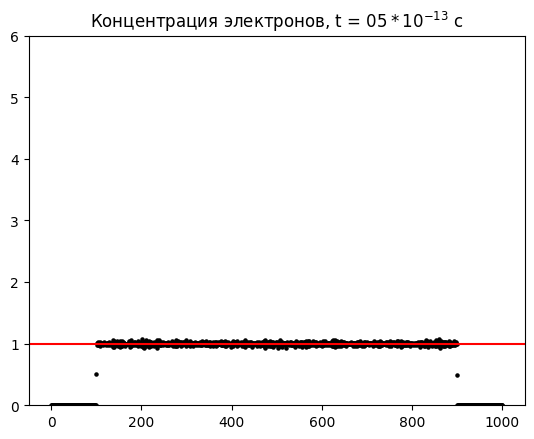

In [9]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        ax.set_ylim((0, 6))
        line = ax.scatter(np.arange(1000+1), e_conc_history[i*50]/1e17, color="k", s=5)
        ax.axhline(1, color="r")
        ax.set_title("Концентрация электронов, t = " + str(i*100*50)+ r"$5*10^{-13}$ c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(1000000),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('e_conc_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

(0.0, 6.0)

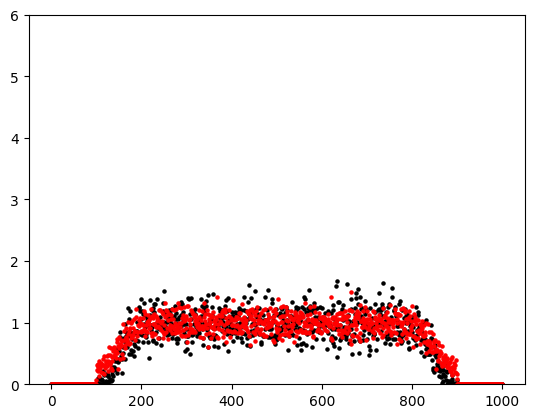

In [80]:
n = 2500
fig, ax = plt.subplots()
ax.scatter(np.arange(N_x+1), e_conc_history[n]/1e17, color="k", s=5)
ax.scatter(np.arange(N_x+1), i_conc_history[n]/1e17, color="r", s=5)
ax.set_ylim((0, 6))

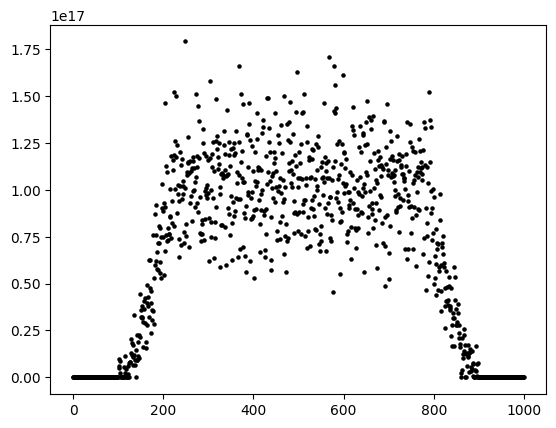

In [122]:
plt.scatter(np.arange(N_x+1), e_conc_history[-1], color="k", s=5 )

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


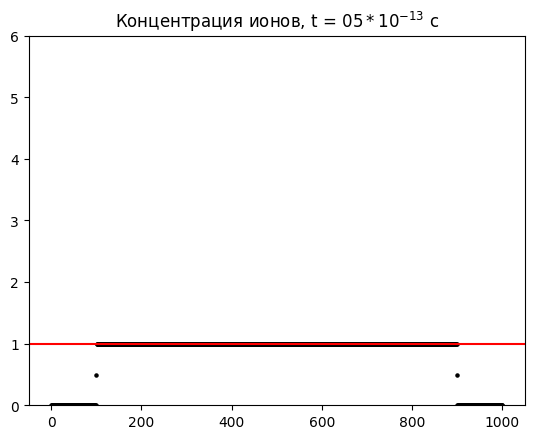

In [173]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        ax.set_ylim((0, 6))
        line = ax.scatter(np.arange(N_x+1), i_conc_history[i*50]/1e17, color="k", s=5)
        ax.axhline(constant_conc/1e17, color="r")
        ax.set_title("Концентрация ионов, t = " + str(i*100*50)+ r"$5*10^{-13}$ c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/i_conc_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

In [53]:
central_phi = np.array([x[500] for x in phi_over_time])

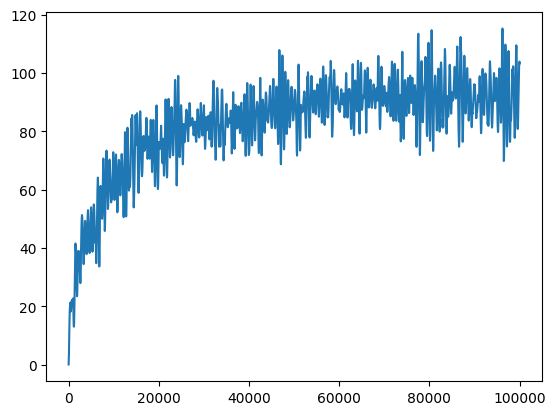

In [54]:
plt.plot(central_phi)

In [208]:
phi_spectre = np.fft.rfft(central_phi)

c:\Users\setup\Desktop\PlasmaPython\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


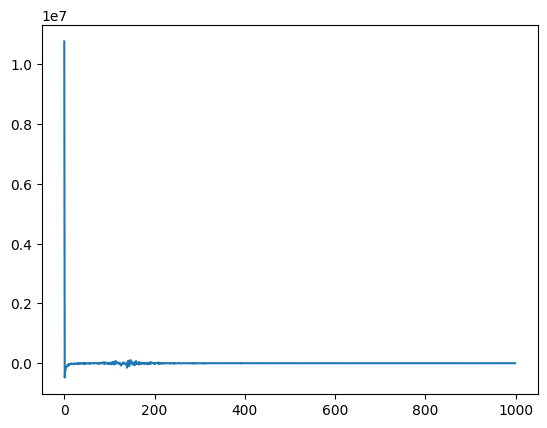

In [209]:
plt.plot(phi_spectre[:1000])

In [210]:
tmax = np.argmin(phi_spectre[10:600])+10

In [211]:
tmax

139

In [212]:
w_exp = tmax*2*np.pi/(n*tau)/1e10
w_exp

1.7467255153959251

In [213]:
w_theory = math.sqrt(n0*q*q/(m_e*epsilon))/1e10
w_theory

1.784401018101099

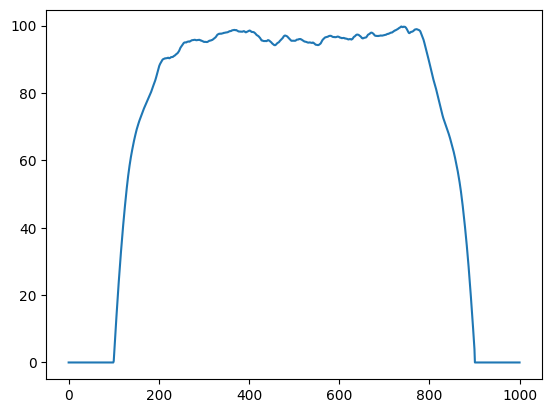

In [176]:
plt.plot(phi_over_time[-1])

In [59]:
electrons.n_macro

8447

In [60]:
ions.n_macro

8858

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


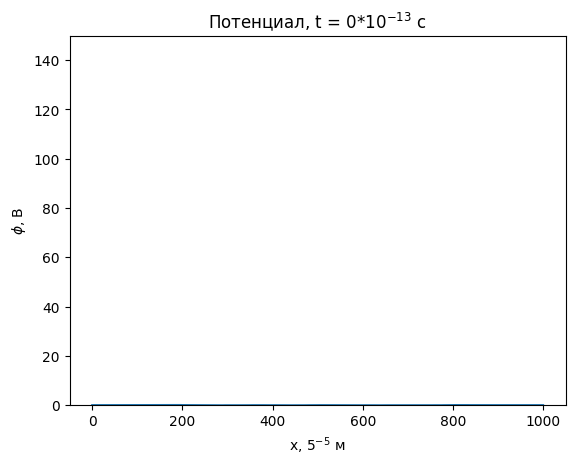

In [178]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(phi_over_time[i*50])
        ax.set_title("Потенциал, t = " + str(2*i*200)+ r"$*10^{-13}$ c")
        #ax.axvline(x=left_wall.right, color='k', linestyle='--', linewidth=1)
        #ax.set_xlim(left_wall.right, right_wall.left)
        ax.set_ylim(0, 150)
        ax.set_ylabel(r"$\phi$, В")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/phi_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


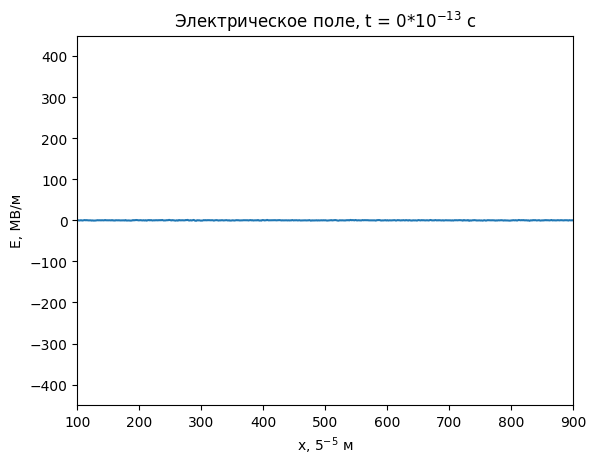

In [179]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(e_over_time[i*50]/1000)
        ax.set_title("Электрическое поле, t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_xlim(left_wall.right, right_wall.left)
        ax.set_ylim(-450, 450)
        ax.set_ylabel(r"E, МВ/м")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/E_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


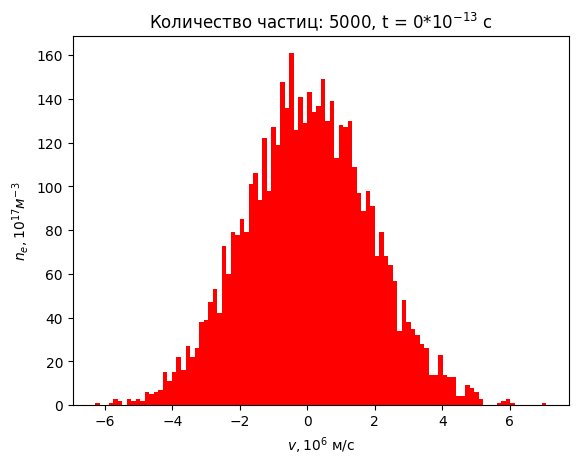

In [166]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        # Calculate the bin width based on the data
        data_min = min(np.min(electron_distrs[i*50]/1e6), np.min(ion_distrs[0]/1000))
        data_max = max(np.max(electron_distrs[i*50]/1e6), np.max(ion_distrs[0]/1000))
        bin_width = 2*(np.percentile(electron_distrs[i*50]/1e6, 75) - np.percentile(electron_distrs[i*50]/1e6, 25))/len(electron_distrs[i*50])**(1/3)
        bins = np.arange(data_min, data_max + bin_width, bin_width)

        line = ax.hist(electron_distrs[0]/1e6, bins=100, color="b")
        ax.hist(electron_distrs[i*50]/1e6, bins=100, color = "r")
        ax.set_title("Количество частиц: " + str(len(electron_distrs[i*50])) + 
                     ", t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{6}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/electron_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


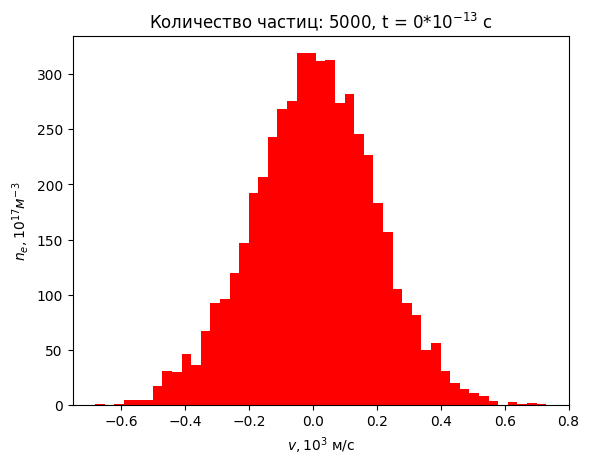

In [167]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        # Calculate the bin width based on the data
        data_min = min(np.min(ion_distrs[i*50]/1000), np.min(ion_distrs[0]/1000))
        data_max = max(np.max(ion_distrs[i*50]/1000), np.max(ion_distrs[0]/1000))
        bin_width = 2*(np.percentile(ion_distrs[i*50]/1000, 75) - np.percentile(ion_distrs[i*50]/1000, 25))/len(ion_distrs[i*50])**(1/3)
        bins = np.arange(data_min, data_max + bin_width, bin_width)
        
        line = ax.hist(ion_distrs[0]/1000, bins=bins, color="b")
        ax.hist(ion_distrs[i*50]/1000, bins=bins, color="r")
        
        ax.set_title("Количество частиц: " + str(len(ion_distrs[i*50])) + 
                     ", t = " + str(2*i*50)+ r"$*10^{-13}$ c")
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{3}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/ion_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

In [112]:
import os
import imageio

gif_dir = 'results/'
paired_gif_dir = 'paired_gifs/'

SEE_gif_files = [filename for filename in os.listdir(gif_dir) if filename.startswith('SEE') and filename.endswith('.gif')]
reg_gif_files = [filename for filename in os.listdir(gif_dir) if not filename.startswith('SEE') and filename.endswith('.gif')]

for SEE_gif_file in SEE_gif_files:
    SEE_gif_path = os.path.join(gif_dir, SEE_gif_file)
    reg_gif_file = SEE_gif_file.replace('SEE', '').lstrip('_')
    reg_gif_path = os.path.join(gif_dir, reg_gif_file)
    if os.path.exists(reg_gif_path):
        SEE_gif = imageio.mimread(SEE_gif_path, memtest=False)
        reg_gif = imageio.mimread(reg_gif_path, memtest=False)
        paired_gifs = [np.concatenate((reg_frame, SEE_frame), axis=1) for reg_frame, SEE_frame in zip(reg_gif, SEE_gif)]
        paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
        imageio.mimwrite(paired_gif_path, paired_gifs, format='gif', fps=30)


In [37]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Set directory paths
reg_gif_dir = 'path/to/regular/gifs'
SEE_gif_dir = 'path/to/SEE/gifs'
paired_gif_dir = 'path/to/paired/gifs'

# Loop through SEE gifs
for SEE_gif_file in os.listdir(SEE_gif_dir):
    if SEE_gif_file.startswith('SEE'):
        # Load regular gif
        reg_gif_file = SEE_gif_file.replace('SEE', '')
        reg_gif_path = os.path.join(reg_gif_dir, reg_gif_file)
        reg_gif = imageio.mimread(reg_gif_path)

        # Load SEE gif
        SEE_gif_path = os.path.join(SEE_gif_dir, SEE_gif_file)
        SEE_gif = imageio.mimread(SEE_gif_path)

        # Combine frames
        paired_gifs = [np.concatenate((reg_frame, SEE_frame), axis=1) for reg_frame, SEE_frame in zip(reg_gif, SEE_gif)]

        # Add title to each frame
        for i, frame in enumerate(paired_gifs):
            fig, ax = plt.subplots()
            ax.imshow(frame, cmap='gray')
            if i == 0:
                ax.set_title('Regular GIF                          SEE GIF')
            plt.axis('off')

            # Save frame
            paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
            imageio.imwrite(paired_gif_path, frame)

        # Combine frames into GIF
        paired_gif_path = os.path.join(paired_gif_dir, SEE_gif_file.replace('SEE', 'paired'))
        with imageio.get_writer(paired_gif_path, mode='I', fps=30) as writer:
            for frame in paired_gifs:
                writer.append_data(frame)


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'path/to/SEE/gifs'

In [39]:
ions_over_time = np.array([len(x) for x in ion_distrs])

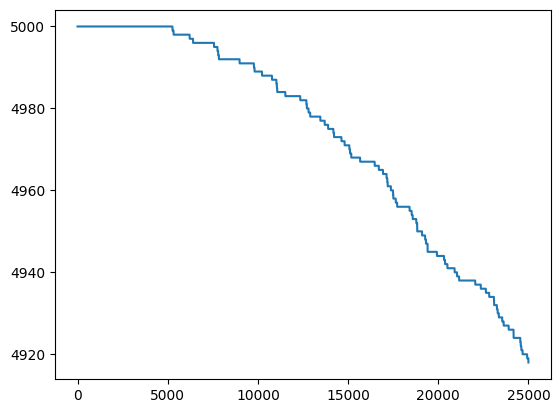

In [40]:
plt.plot(ions_over_time)

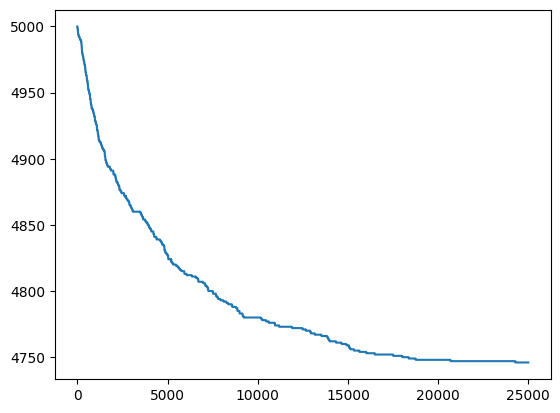

In [41]:
electrons_over_time = np.array([len(x) for x in electron_distrs])
plt.plot(electrons_over_time)


(array([2.50911614e-07, 4.18186024e-07, 1.67274409e-07, 3.34548819e-07,
        3.34548819e-07, 4.18186024e-07, 5.01823228e-07, 2.50911614e-07,
        2.50911614e-07, 4.18186024e-07, 6.69097638e-07, 5.85460433e-07,
        3.34548819e-07, 8.36372047e-07, 5.01823228e-07, 4.18186024e-07,
        9.20009252e-07, 8.36372047e-07, 9.20009252e-07, 1.42183248e-06,
        1.00364646e-06, 2.09093012e-06, 1.14582970e-05, 6.73279498e-05,
        1.47786941e-04, 1.19099380e-04, 3.40403423e-05, 5.01823228e-06,
        1.58910689e-06, 7.52734843e-07, 1.33819528e-06, 1.17092087e-06,
        6.69097638e-07, 5.01823228e-07, 7.52734843e-07, 4.18186024e-07,
        5.85460433e-07, 5.01823228e-07, 4.18186024e-07, 5.01823228e-07,
        4.18186024e-07, 4.18186024e-07, 4.18186024e-07, 5.01823228e-07,
        5.01823228e-07, 1.67274409e-07, 3.34548819e-07, 4.18186024e-07,
        8.36372047e-08, 2.50911614e-07]),
 array([-60222.11855083, -57790.96737177, -55359.81619272, -52928.66501366,
        -50497.513

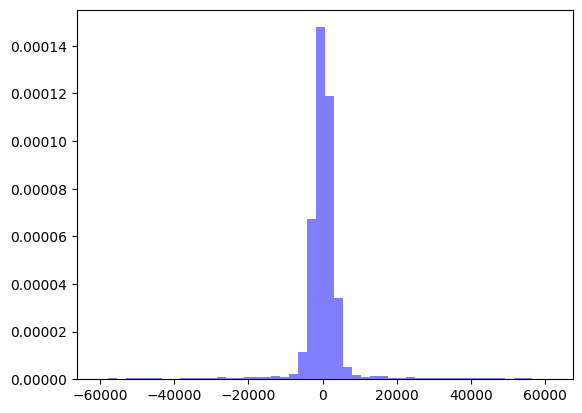

In [44]:
plt.hist(ion_distrs[-1], bins=50, density=True, facecolor='blue', alpha=0.5)

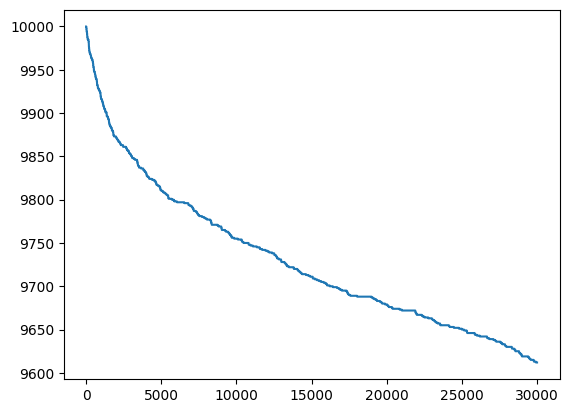

In [39]:
plt.plot(electrons_over_time+ions_over_time)
